<a href="https://colab.research.google.com/github/getmubarak/ML/blob/master/algorithms/keras/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Setup

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline 

dict = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}
def plot_image(number):
    fig = plt.figure(figsize = (5,3))
    plt.imshow(x_train[number])
    plt.title(dict[y_train_[number][0]])

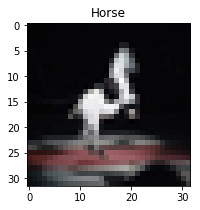

In [29]:
plot_image(321)


In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

## Model Definition

In [5]:
from keras.models import Sequential
model = Sequential()

W0718 11:47:23.519712 140441413113728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [7]:
model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))

W0718 11:47:35.178366 140441413113728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 11:47:35.190991 140441413113728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
model.add(MaxPool2D())

W0718 11:47:38.842167 140441413113728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())

In [0]:
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

W0718 11:47:47.864399 140441413113728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 11:47:47.894305 140441413113728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
_________________________________________________________________
None


## Fitting

In [13]:
history = model.fit(x_train, y_train, batch_size=50, epochs=15, verbose=1, validation_data=(x_test, y_test))

W0718 11:47:54.885625 140441413113728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0718 11:47:54.940309 140441413113728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 12s 246us/step - loss: 1.5123 - acc: 0.4640 - val_loss: 1.2733 - val_acc: 0.5530
Epoch 2/15
50000/50000 [==============================] - 6s 111us/step - loss: 1.1799 - acc: 0.5895 - val_loss: 1.1293 - val_acc: 0.6068
Epoch 3/15
50000/50000 [==============================] - 6s 111us/step - loss: 1.0544 - acc: 0.6361 - val_loss: 1.0413 - val_acc: 0.6431
Epoch 4/15
50000/50000 [==============================] - 6s 114us/step - loss: 0.9784 - acc: 0.6622 - val_loss: 1.0059 - val_acc: 0.6569
Epoch 5/15
50000/50000 [==============================] - 6s 110us/step - loss: 0.9288 - acc: 0.6804 - val_loss: 0.9727 - val_acc: 0.6675
Epoch 6/15
50000/50000 [==============================] - 6s 116us/step - loss: 0.8828 - acc: 0.6966 - val_loss: 0.9547 - val_acc: 0.6765
Epoch 7/15
50000/50000 [==============================] - 6s 115us/step - loss: 0.8458 - acc: 0.7091 - val_loss: 0.9327 -

In [0]:
py = model.predict(x_test)


In [0]:
def plot_image2(number):
    fig = plt.figure(figsize = (5,3))
    plt.imshow(x_test[number])

None
[7.3005870e-04 9.5344788e-01 1.9587551e-05 2.8573361e-03 2.4909508e-07
 3.5925671e-02 1.2920321e-03 5.3580108e-05 4.6961995e-06 5.6688976e-03]


{0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}

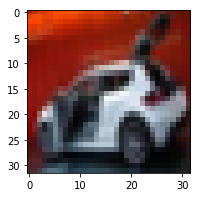

In [56]:
print(plot_image2(6))
print(py[6])
dict